In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')
trip_advisor = '한림공원, 비자림, 제주 돌문화 공원, 제주 절물 자연 휴양림, 제주 4.3 평화공원, 한라 수목원, 우도등대공원, 사라봉공원. 함덕 서우봉 해변, 협재 해수욕장, 월정리 해변, 세화 해수욕장, 이호테우 해변, 금능해수욕장, 김녕 성세기 해변, 곽지 해수욕장, 에코랜드 테마파크, 제주 유리의 성, 테지움 제주, 더 마 파크, 제주 공룡 랜드, 제주미니미니랜드, 파크 써던랜드, 스누피 가든, 한림공원, 제주김녕미로공원, 메이즈랜드, 다희연, 김경숙해바라기농장, 제주불빛정원, 카페 글렌코, 토끼섬, 수월봉, 제주김녕미로공원, 신비의 도로, 용두암, 신창 풍차해안도로, 항파두리 항몽, 제주불빛정원, 수월봉, 한담해안산책로, 신창 풍차해안도로, 검멀레, 서우봉, 관음사탐방로, 왕따나무, 민오름 - 오라동, 녹산로유채꽃길, 우도, 만장굴, 함덕 서우봉 해변, 동문 재래시장, 협재 해수욕장, 한림공원, 에코랜드 테마파크, 비자림, 산굼부리 분화구, 한라산 성판악. 해녀 박물관, 성읍 민속마을 '
hotels = '한라산, 성산일출봉, 섭지코지, 만장굴, 우도, 추자도, 국립제주박물관, 성읍민속마을. 휴애리 자연생활공원, 제주 올레'
jeju_iljung = '섭지코지, 용두암&용연, 오설록티뮤지엄, 사계해안, 하귀↔애월 해안도로, 쇠소깍 , 한담해안산책로 , 월정리해변 , 제주시 동문재래시장 , 신비의도로(경유) , 협재해수욕장(산책) , 외돌개 , 새연교 , 1100고지습지 , 서귀포매일올레시장'

sentences = sent_tokenize(text = trip_advisor)

print(type(sentences), len(sentences))

<class 'list'> 3


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import re
import pandas as pd
trip_advisor = trip_advisor.replace(',', ' ')
print(trip_advisor)

한림공원  비자림  제주 돌문화 공원  제주 절물 자연 휴양림  제주 4.3 평화공원  한라 수목원  우도등대공원  사라봉공원. 함덕 서우봉 해변  협재 해수욕장  월정리 해변  세화 해수욕장  이호테우 해변  금능해수욕장  김녕 성세기 해변  곽지 해수욕장  에코랜드 테마파크  제주 유리의 성  테지움 제주  더 마 파크  제주 공룡 랜드  제주미니미니랜드  파크 써던랜드  스누피 가든  한림공원  제주김녕미로공원  메이즈랜드  다희연  김경숙해바라기농장  제주불빛정원  카페 글렌코  토끼섬  수월봉  제주김녕미로공원  신비의 도로  용두암  신창 풍차해안도로  항파두리 항몽  제주불빛정원  수월봉  한담해안산책로  신창 풍차해안도로  검멀레  서우봉  관음사탐방로  왕따나무  민오름 - 오라동  녹산로유채꽃길  우도  만장굴  함덕 서우봉 해변  동문 재래시장  협재 해수욕장  한림공원  에코랜드 테마파크  비자림  산굼부리 분화구  한라산 성판악. 해녀 박물관  성읍 민속마을 


In [4]:
from nltk import word_tokenize
words = word_tokenize(trip_advisor)
print(words)

['한림공원', '비자림', '제주', '돌문화', '공원', '제주', '절물', '자연', '휴양림', '제주', '4.3', '평화공원', '한라', '수목원', '우도등대공원', '사라봉공원', '.', '함덕', '서우봉', '해변', '협재', '해수욕장', '월정리', '해변', '세화', '해수욕장', '이호테우', '해변', '금능해수욕장', '김녕', '성세기', '해변', '곽지', '해수욕장', '에코랜드', '테마파크', '제주', '유리의', '성', '테지움', '제주', '더', '마', '파크', '제주', '공룡', '랜드', '제주미니미니랜드', '파크', '써던랜드', '스누피', '가든', '한림공원', '제주김녕미로공원', '메이즈랜드', '다희연', '김경숙해바라기농장', '제주불빛정원', '카페', '글렌코', '토끼섬', '수월봉', '제주김녕미로공원', '신비의', '도로', '용두암', '신창', '풍차해안도로', '항파두리', '항몽', '제주불빛정원', '수월봉', '한담해안산책로', '신창', '풍차해안도로', '검멀레', '서우봉', '관음사탐방로', '왕따나무', '민오름', '-', '오라동', '녹산로유채꽃길', '우도', '만장굴', '함덕', '서우봉', '해변', '동문', '재래시장', '협재', '해수욕장', '한림공원', '에코랜드', '테마파크', '비자림', '산굼부리', '분화구', '한라산', '성판악', '.', '해녀', '박물관', '성읍', '민속마을']


In [5]:
!pip install konlpy
from konlpy.tag import Kkma
from konlpy.utils import pprint

In [6]:
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt


In [18]:
counts = Counter(words)
tags = counts.most_common(60)

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
print(tags)

[('제주', 6), ('해변', 5), ('해수욕장', 4), ('한림공원', 3), ('서우봉', 3), ('비자림', 2), ('.', 2), ('함덕', 2), ('협재', 2), ('에코랜드', 2), ('테마파크', 2), ('파크', 2), ('제주김녕미로공원', 2), ('제주불빛정원', 2), ('수월봉', 2), ('신창', 2), ('풍차해안도로', 2), ('돌문화', 1), ('공원', 1), ('절물', 1), ('자연', 1), ('휴양림', 1), ('4.3', 1), ('평화공원', 1), ('한라', 1), ('수목원', 1), ('우도등대공원', 1), ('사라봉공원', 1), ('월정리', 1), ('세화', 1), ('이호테우', 1), ('금능해수욕장', 1), ('김녕', 1), ('성세기', 1), ('곽지', 1), ('유리의', 1), ('성', 1), ('테지움', 1), ('더', 1), ('마', 1), ('공룡', 1), ('랜드', 1), ('제주미니미니랜드', 1), ('써던랜드', 1), ('스누피', 1), ('가든', 1), ('메이즈랜드', 1), ('다희연', 1), ('김경숙해바라기농장', 1), ('카페', 1), ('글렌코', 1), ('토끼섬', 1), ('신비의', 1), ('도로', 1), ('용두암', 1), ('항파두리', 1), ('항몽', 1), ('한담해안산책로', 1), ('검멀레', 1), ('관음사탐방로', 1)]


In [16]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf']

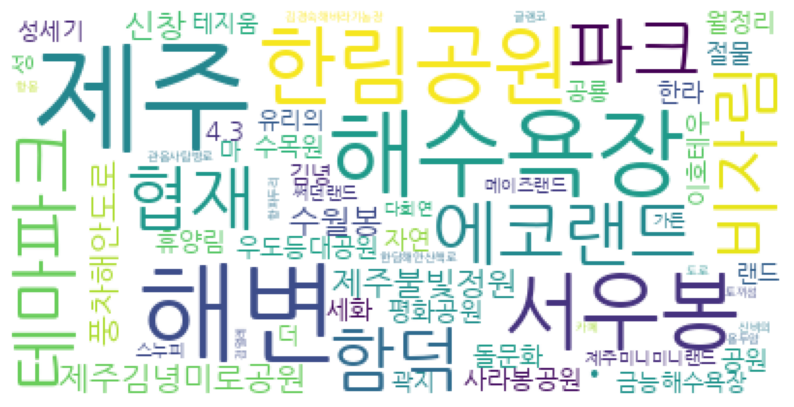

In [19]:
wc = WordCloud(font_path=FONT_PATH,background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()